In [2]:
import numpy as np
import scipy
from sklearn.cluster import KMeans
import rasterio
import matplotlib.pyplot as plt

In [3]:
import os
from collections import OrderedDict

def load_jp2(path):
  d = OrderedDict()
  for file in os.listdir(path):
    if file.endswith('.jp2'):
      id = file.split('_')[2]
      full_path = path + file
      d[id] = ds = rasterio.open(full_path)
      
  return d      
      
r60m = load_jp2('./data/R60m/')
r20m = load_jp2('./data/R20m/')
r10m = load_jp2('./data/R10m/')

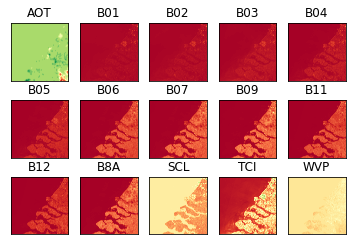

In [134]:
for i, (band, data) in enumerate(r60m.items()):
  ax = plt.subplot2grid((3,5), (i//5, i%5))
  ax.imshow(data.read()[0], cmap='RdYlGn')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title(band)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


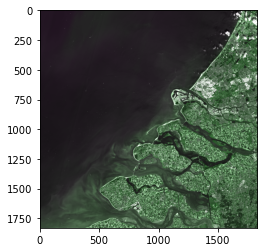

In [109]:
# pseudo rgb
bands = ['B02', 'B03', 'B02']
dataset = r60m

data = [dataset[band] for band in bands if band in dataset]
stack = np.swapaxes([img.read()[0].flatten()/2000 for img in data], 0, 1)
rgb_arr = np.array(np.split(stack, data[0].width))
  
plt.imshow(rgb_arr)

In [145]:
# parameters
bands = ['B02', 'B04']
dataset = r60m
n_labels = 3


data = [dataset[band] for band in bands if band in dataset]
stack = np.swapaxes([img.read()[0].flatten() for img in data], 0, 1)
kmeans = KMeans(n_clusters=n_labels).fit(stack)
label_arr = np.array(np.split(kmeans.labels_, data[0].width))

for i in range(n_labels):
  print('Label %s: %s occurences' % (i, np.count_nonzero(kmeans.labels_ == i)))
  

Label 0: 2662675 occurences
Label 1: 31379 occurences
Label 2: 654846 occurences


In [ ]:
matrix = []
for i in r60m.items():
  row = []
  for j in r60m.items():
    
  
  



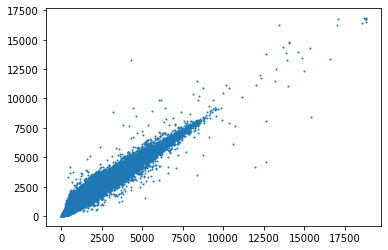

In [146]:
rgb = np.array(['r', 'g', 'b'])

plt.scatter(data[0].read()[0].flatten(), data[1].read()[0].flatten(), s=1, c=rgb[)

In [147]:
kmeans.labels_

array([0, 0, 0, ..., 2, 0, 2])

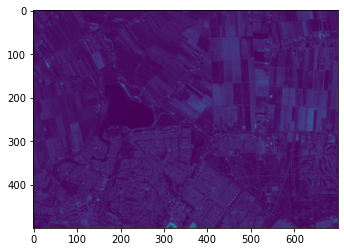

In [143]:
# location of subset
subset = (601200.0, 5773695.0, 700, 500)

def crop(ds, x, y, row, col):
  row_off,col_off = ds.index(x,y)
  window = rasterio.windows.Window(col_off, row_off, row, col)
  return ds.read(window=window)
     
plt.imshow(
  crop(r10m['B04'], *subset)[0])